In [21]:
import vcf

vcf_reader = vcf.Reader(open("/home/user/code/SVdetect/svim/tools/svim/ont_12-24.vcf", 'r'))
vcf_writer = vcf.Writer(open('/home/user/code/SVdetect/svim/tools/svim/variants_filtered.vcf', 'w'), vcf_reader)
for record in vcf_reader:
    rec_support = record.INFO.get('SUPPORT')
    if int(rec_support) >= 10:
        vcf_writer.write_record(record)

In [10]:
import csv
import os
import re
import subprocess

vcf_list = ['/home/user/code/SVDF/ont/ont.vcf' ]
for vcf in vcf_list:
    header, sv_list_1, sv_list_2, sv_list_3, sv_list_4, sv_list_5, sv_list_6, sv_list_7,  sv_list_8  = [], [], [], [], [], [], [], [], []
    ins_1, ins_2, ins_3, ins_4, ins_5, ins_6, ins_7,  ins_8  = 0, 0, 0, 0, 0, 0, 0, 0
    del_1, del_2, del_3, del_4, del_5, del_6, del_7,  del_8  = 0, 0, 0, 0, 0, 0, 0, 0
    with open(vcf, 'r') as f:
        for line in f:
            if line.startswith('#'):
                header.append(line)
                continue
            rec = line.split('\t')
            chr, svstart = rec[0], int(rec[1])
            svtype = re.search(r'SVTYPE=([^;]+)', rec[7]).group(1)
            if svtype == 'DEL' or svtype == 'INS':
                matches = re.search(r'SVLEN=([^;]+)', rec[7])
                svlen = abs(int(matches.group(1)))
            else:
                continue
            if 50<=svlen<100:
                sv_list_1.append(line)
                if svtype == 'DEL':
                    del_1+=1 
                else:
                    ins_1+=1 
            elif 100<=svlen<200:
                sv_list_2.append(line)
                if svtype == 'DEL':
                    del_2+=1 
                else:
                    ins_2+=1 
            elif 200<=svlen<500:
                sv_list_3.append(line)
                if svtype == 'DEL':
                    del_3+=1 
                else:
                    ins_3+=1 
            elif 500<=svlen<1000:
                sv_list_4.append(line)
                if svtype == 'DEL':
                    del_4+=1 
                else:
                    ins_4+=1 
            elif 1000<=svlen<2000:
                sv_list_5.append(line)
                if svtype == 'DEL':
                    del_5+=1 
                else:
                    ins_5+=1 
            elif 2000<=svlen<5000:
                sv_list_6.append(line)
                if svtype == 'DEL':
                    del_6+=1 
                else:
                    ins_6+=1 
            elif 5000<=svlen<10000:
                sv_list_7.append(line)
                if svtype == 'DEL':
                    del_7+=1 
                else:
                    ins_7+=1 
            elif 10000<=svlen:
                sv_list_8.append(line)
                if svtype == 'DEL':
                    del_8+=1 
                else:
                    ins_8+=1 
    print(vcf)
    print(del_1, del_2, del_3, del_4, del_5, del_6, del_7, del_8)
    print(ins_1, ins_2, ins_3, ins_4, ins_5, ins_6, ins_7, ins_8)
    sv_len_list,final_out_list, tool_final_out_list = [], [], []
    for index, sv_list in enumerate([sv_list_1, sv_list_2, sv_list_3, sv_list_4, sv_list_5, sv_list_6, sv_list_7, sv_list_8]):
        with open("{0}_{1}.vcf".format(vcf.split('.')[0], index), 'w') as f:
            for line in header:
                f.write(line)
            for line in sv_list:
                f.write(line)
        sv_len_list.append(len(sv_list))
        # os.system("less {0}_{1}_.vcf|grep -v \'#\'|sort -k1,1d -k2,2n >body".format(vcf.split('.')[0], index))
        # os.system("less {0}_{1}_.vcf|grep \'^#\' >header".format(vcf.split('.')[0], index))
        # os.system("cat header body >{0}_{1}.vcf".format(vcf.split('.')[0], index))
        os.system("/home/user/miniconda3/envs/tf-2/bin/bgzip -f {0}_{1}.vcf".format(vcf.split('.')[0], index))
        os.system("/home/user/miniconda3/envs/tf-2/bin/tabix -f {0}_{1}.vcf.gz".format(vcf.split('.')[0], index))

        result = subprocess.run(
            "/home/user/miniconda3/envs/tf-2/bin/truvari  bench  -f /home/user/code/SVdetect/data/hs37d5.fa -b tools/truvari/clr_12-24_{2}.vcf.gz  -o svim_eval --sizemin 50 --sizefilt 50 --passonly  -p 0.00 -c {1}_{2}.vcf.gz   --includebed /home/user/code/SVdetect/data/giab/HG002_SVs_Tier1_v0.6.bed".format(vcf.split('/')[-1], vcf.split('.')[0], index), shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
        cmd_out = result.stderr.decode()
        try:
            precision = re.findall(r'"precision":\s+(\d+\.\d+)', cmd_out)[-1]
            recall = re.findall(r'"recall":\s+(\d+\.\d+)', cmd_out)[-1]
            f1 = re.findall(r'"f1":\s+(\d+\.\d+)', cmd_out)[-1]
            final_out = f1
            final_out_list.append(final_out)
            os.system("rm -r svim_eval")
        except:
            print(cmd_out)
            os.system("rm -r svim_eval")
    tool_final_out_list.append(final_out_list)
    with open('res.csv',  'a', newline='') as csv_file:
        for row in tool_final_out_list:
            csv_writer = csv.writer(csv_file)
            csv_writer.writerow(row)
            

/home/user/code/SVDF/ont/ont.vcf
1429 777 824 189 120 103 39 46
1291 1063 1458 666 336 217 56 65


[W::tbx_parse1] Coordinate <= 0 detected. Did you forget to use the -0 option?
[W::tbx_parse1] Coordinate <= 0 detected. Did you forget to use the -0 option?
[W::tbx_parse1] Coordinate <= 0 detected. Did you forget to use the -0 option?


1158.5
[[1207, 999, 1134, 1166, 1197, 1228, 1208, 1194, 1214, 1228, 1207, 1217, 1167, 1148, 1191, 1151, 1209, 944, 1089], [257, 207, 233, 296], [74, 58, 58]]


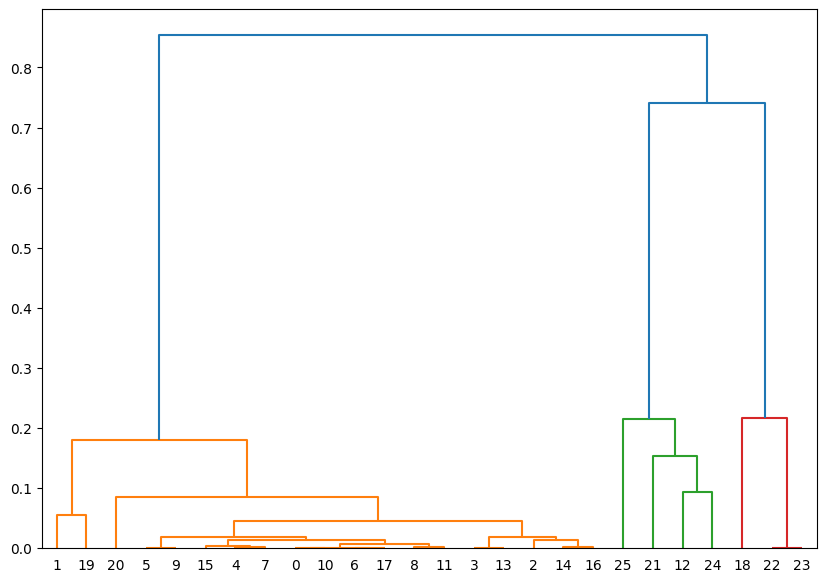

In [3]:
import numpy as np
from scipy.cluster.hierarchy import linkage, fcluster
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

clu_str = '1207	999	1134	1166	1197	1228	1208	1194	1214	1228	1207	1217	257	1167	1148	1191	1151	1209	74	944	1089	207	58	58	233	296'
clu_list = clu_str.split('\t')
print(np.median([int(i) for i in clu_list]))
clu_list = [int(i) for i in clu_list]
distance_data = []
clusters_final = []
for i in range(len(clu_list) - 1):  # 局部深度反映了当前sv在1000bp以内的相似sv的个数
    for j in range(i + 1, len(clu_list)):
        distance_data.append(
            abs(clu_list[i] - clu_list[j])/max(clu_list[i], clu_list[j]))
Z = linkage(np.array(distance_data), method="average")
cluster_indices = list(fcluster(Z, 0.3, criterion='distance'))
new_clusters = [[] for i in range(max(cluster_indices))]
for signature_index, cluster_index in enumerate(cluster_indices):
    new_clusters[cluster_index - 1].append(clu_list[signature_index])
clusters_final.extend(new_clusters)
print(clusters_final)
plt.figure(figsize=(10,7))

sch.dendrogram(Z,leaf_rotation=0)
#设置字体new roman
# plt.title('Dendrogram of SVs clustering', fontsize=20, fontname='Times New Roman')
# plt.xlabel('SV index', fontsize=20, fontname='Times New Roman')
# plt.ylabel('Distance', fontsize=20, fontname='Times New Roman')
#保存为矢量图格式
plt.savefig('dendrogram.eps', format='eps')
plt.show()